In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from CZAR import *

In [2]:
H_in_kJmol = 2625.499639 # Hartree/kJmol
H_in_J  = 4.359744e-18
bohr2angs = 0.52917721092e0
kB      = 1.380648e-23      # J / K
H_to_u   = 2.921264912428e-8  # Hartree to mass unit
fs_to_au = 41.341374575751    # a.u. per fs
kB_a = kB / H_in_J
R = 8.314
T = 300.0

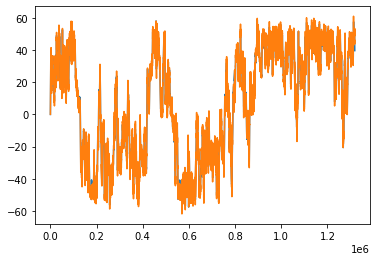

In [3]:
abf = pd.read_csv('CV_traj.dat', sep='\t')
abf.columns = ['time', 'Xi0', 'eXi0', '-']
plt.plot(abf['time'],abf['Xi0'])
plt.plot(abf['time'],abf['eXi0'])

In [4]:
ABF_out = pd.DataFrame(dtype=np.float64)
ABF_out = pd.read_csv('ABF_bias_out.txt',sep='\t')
ABF_out.columns = ['Bin','Xi','Hist','Mean Grad','Mean Force', 'dF', 'dF geom']

In [5]:
eABF_out = pd.DataFrame(dtype=np.float64)
eABF_out = pd.read_csv('bias_out.txt',sep='\t') # sigma=2.0 Bohr, tau=10000, N_full=100
eABF_out.columns = ['Bin','Xi','Hist','Mean Grad','Mean Force', 'dF', 'dF geom', 'dF/CZAR', 'dF/CZAR geom']

In [6]:
metaD_out = pd.DataFrame(dtype=np.float64)
metaD_out = pd.read_csv('metaD_bias_out.txt',sep='\t') # sigma=2.0 Bohr, height=0.1kJ/mol,tau=20 steps, dT=2000K
metaD_out.columns = ['Bin','Xi','Hist','Mean Grad','Mean Force', 'dF', 'dF geom']

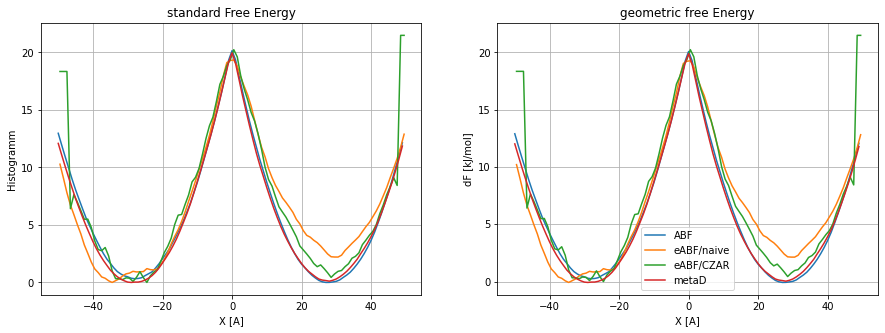

In [7]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.plot(ABF_out['Xi'],ABF_out['dF']*H_in_kJmol,label='ABF')
ax2.plot(ABF_out['Xi'],ABF_out['dF geom']*H_in_kJmol,label='ABF')

ax1.plot(eABF_out['Xi'],eABF_out['dF']*H_in_kJmol,label='eABF/naive')
ax2.plot(eABF_out['Xi'],eABF_out['dF geom']*H_in_kJmol,label='eABF/naive')

ax1.plot(eABF_out['Xi'],eABF_out['dF/CZAR']*H_in_kJmol,label='eABF/CZAR')
ax2.plot(eABF_out['Xi'],eABF_out['dF/CZAR']*H_in_kJmol,label='eABF/CZAR')

ax1.plot(metaD_out['Xi'],metaD_out['dF']*H_in_kJmol,label='metaD')
ax2.plot(metaD_out['Xi'],metaD_out['dF geom']*H_in_kJmol,label='metaD')

ax1.set_title('standard Free Energy')
ax2.set_title('geometric free Energy')
ax1.set_xlabel('X [A]')
ax1.set_ylabel('Histogramm')
ax2.set_xlabel('X [A]')
ax2.set_ylabel('dF [kJ/mol]')
ax1.grid()
ax2.grid()
plt.legend()

In [8]:
eABF_out

,Bin,Xi,Hist,Mean Grad,Mean Force,dF,dF geom,dF/CZAR,dF/CZAR geom
0,0,-49.5,2723.0,1.030776,-0.000463,0.003915,0.003886,0.006985,0.006956
1,1,-48.5,2732.0,1.030776,-0.000482,0.003452,0.003423,0.006985,0.006956
2,2,-47.5,2564.0,1.030776,-0.000406,0.002969,0.002941,0.006985,0.006956
3,3,-46.5,2468.0,1.030776,-0.000318,0.002564,0.002535,0.002442,0.002413
4,4,-45.5,2183.0,1.030776,-0.000331,0.002246,0.002217,0.002907,0.002878
...,...,...,...,...,...,...,...,...,...
95,95,45.5,4139.0,1.030776,0.000309,0.003470,0.003441,0.003171,0.003142
96,96,46.5,4035.0,1.030776,0.000326,0.003780,0.003751,0.003470,0.003441
97,97,47.5,4307.0,1.030776,0.000370,0.004106,0.004077,0.003212,0.003183
98,98,48.5,4338.0,1.030776,0.000433,0.004475,0.004447,0.008181,0.008152
